In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from decimal import Decimal
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [ ]:
# Importing following libraries for preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
# Importing performance metrics
from sklearn import preprocessing,metrics

from sklearn.metrics import (accuracy_score, confusion_matrix, auc, precision_score, recall_score, f1_score, roc_curve, roc_auc_score)
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import (GridSearchCV, RandomizedSearchCV)


In [ ]:
# Importing necessary libraries
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
# Uploading the data in drive
uploaded = files.upload()

Saving PreProcessedData.csv to PreProcessedData.csv


In [ ]:
# Read Database file using pd.read_csv command, pass CSV file name and path
DataSet = pd.read_csv('Biodiversity_by_County_-_Distribution_of_Animals__Plants_and_Natural_Communities.csv').fillna(0)
df = DataSet.copy()

In [ ]:
df.head()
# Nominal Variables: County, Category, Taxonomic Group, Taxonomic Subgroup, Scientific name, Common name, Year last documented, NY listing status, Federal listing status and Distribution Status
# Ordinal variables: State conservation rank, Global conservation rank

,County,Category,Taxonomic Group,Taxonomic Subgroup,Scientific Name,Common Name,Year Last Documented,NY Listing Status,Federal Listing Status,State Conservation Rank,Global Conservation Rank,Distribution Status
0,Albany,Animal,Amphibians,Frogs and Toads,Anaxyrus americanus,American Toad,1990-1999,Game with open season,not listed,S5,G5,Recently Confirmed
1,Albany,Animal,Amphibians,Frogs and Toads,Anaxyrus fowleri,Fowler's Toad,1990-1999,Game with open season,not listed,S4,G5,Recently Confirmed
2,Albany,Animal,Amphibians,Frogs and Toads,Hyla versicolor,Gray Treefrog,1990-1999,Game with open season,not listed,S5,G5,Recently Confirmed
3,Albany,Animal,Amphibians,Frogs and Toads,Lithobates catesbeianus,Bullfrog,1990-1999,Game with open season,not listed,S5,G5,Recently Confirmed
4,Albany,Animal,Amphibians,Frogs and Toads,Lithobates clamitans,Green Frog,1990-1999,Game with open season,not listed,S5,G5,Recently Confirmed


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   County                    20507 non-null  object
 1   Category                  20507 non-null  object
 2   Taxonomic Group           20507 non-null  object
 3   Taxonomic Subgroup        20507 non-null  object
 4   Scientific Name           20507 non-null  object
 5   Common Name               20507 non-null  object
 6   Year Last Documented      20507 non-null  object
 7   NY Listing Status         20507 non-null  object
 8   Federal Listing Status    20507 non-null  object
 9   State Conservation Rank   20507 non-null  object
 10  Global Conservation Rank  20507 non-null  object
 11  Distribution Status       20507 non-null  object
dtypes: object(12)
memory usage: 1.9+ MB


Interpretation: There are 20,507 data points and all features are categorical in nature

In [ ]:
# Checking null valyes present n the data
df.isnull().sum()
# There are no null values present in the dataset

County                      0
Category                    0
Taxonomic Group             0
Taxonomic Subgroup          0
Scientific Name             0
Common Name                 0
Year Last Documented        0
NY Listing Status           0
Federal Listing Status      0
State Conservation Rank     0
Global Conservation Rank    0
Distribution Status         0
dtype: int64

In [ ]:
# Finding number of levels in each variable
unique = df.nunique().sort_values(ascending = False)

In [ ]:
unique
# No variable has only single level. Therefore, all variables are considered.

Scientific Name             1582
Common Name                 1578
Year Last Documented         187
Taxonomic Subgroup           105
County                        66
Global Conservation Rank      63
State Conservation Rank       43
Taxonomic Group               27
NY Listing Status             11
Federal Listing Status         6
Distribution Status            4
Category                       3
dtype: int64

In [ ]:
# Removing duplicates
df.drop_duplicates(keep = 'first', inplace = True)

In [ ]:
# Checking special characters
categorical_data = df.select_dtypes(include = ['object']).copy()
numerical_data = df.select_dtypes(include = ['int64','float64']).copy()

In [ ]:
#Checking the special characters present in the dataset
#Percentage of frequencies of each level in all categorical variables.
frequencies1 = categorical_data.apply(lambda x: x.value_counts(normalize=True)*100).T.stack()
print(frequencies1) # No special characters are present in the dataset.

County                    Albany                                   1.965183
                          Allegany                                 1.175208
                          Atlantic Ocean and Long Island Sound     0.068269
                          Bronx                                    1.409275
                          Broome                                   1.194714
                                                                    ...    
Global Conservation Rank  GXQ                                      0.004876
Distribution Status       Extirpated                               1.667723
                          Historically Confirmed                  16.399278
                          Possible but not Confirmed               3.291559
                          Recently Confirmed                      78.641440
Length: 3675, dtype: float64


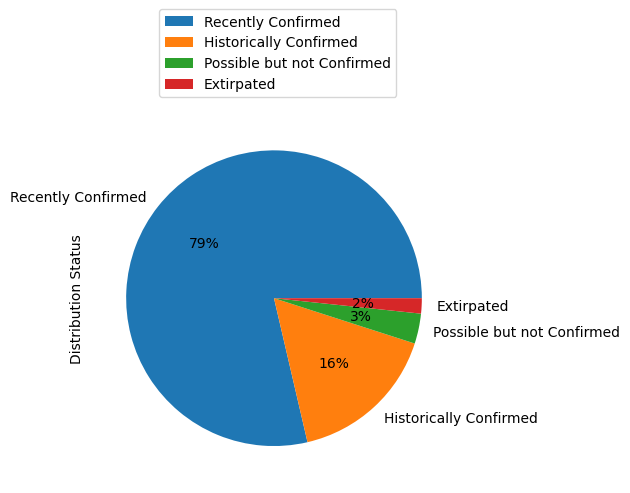

In [ ]:
# Calculating data balance of target variable in dataset
df['Distribution Status'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
plt.legend(bbox_to_anchor=(0.85,1.025), loc="lower right")
# Displays percentage values rounded off

Dataset is highly imbalanced. Therefore, SMOTe technique will be used for data balancing.

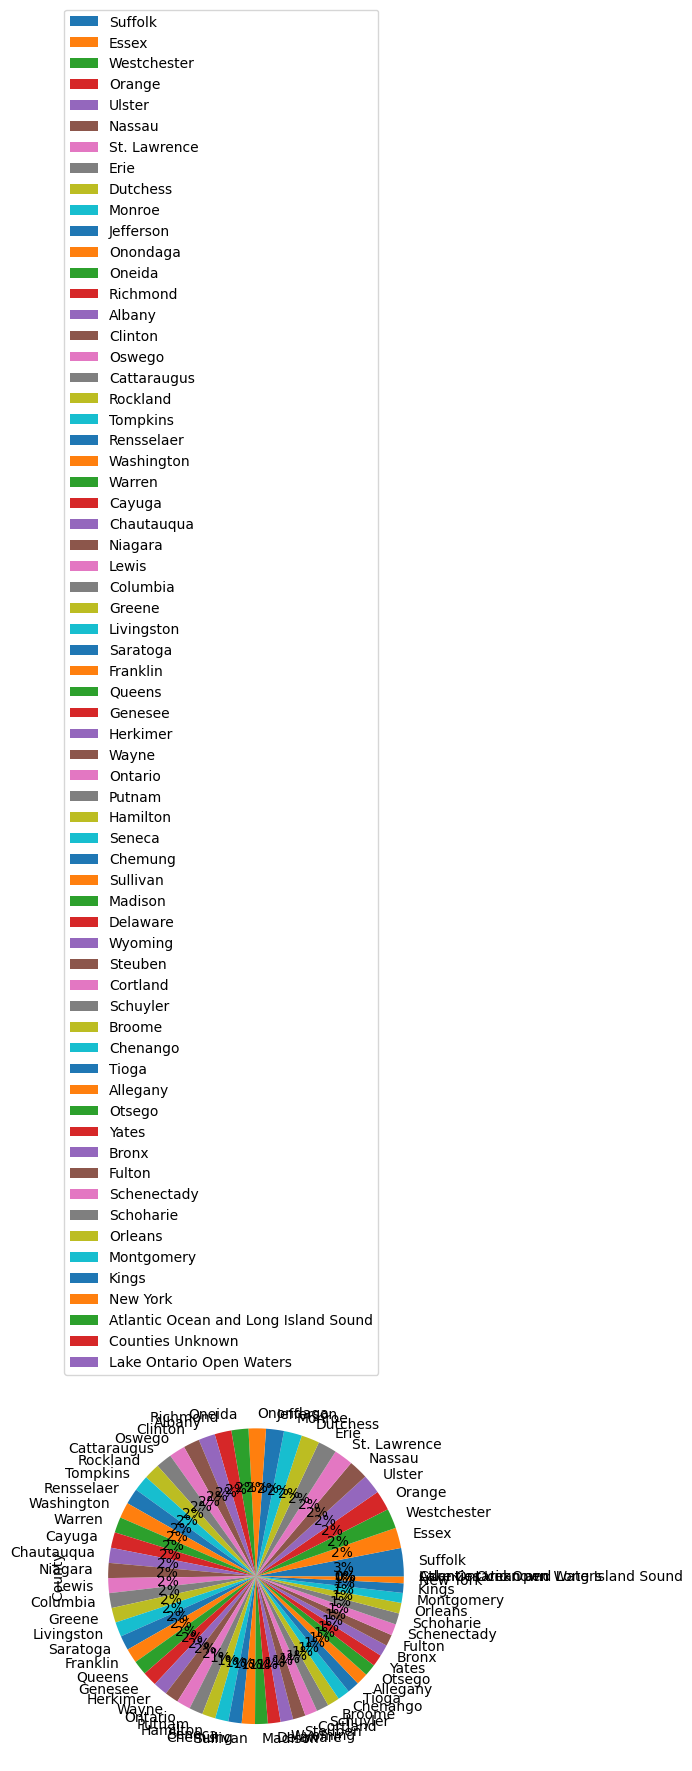

In [ ]:
# Pie chart (%) of Federal Listing Status variable
df['County'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
plt.legend(bbox_to_anchor=(0.85,1.025), loc="lower right")
# Displays percentage values rounded off

Interpretation: Data from all counties has almost equal percentage

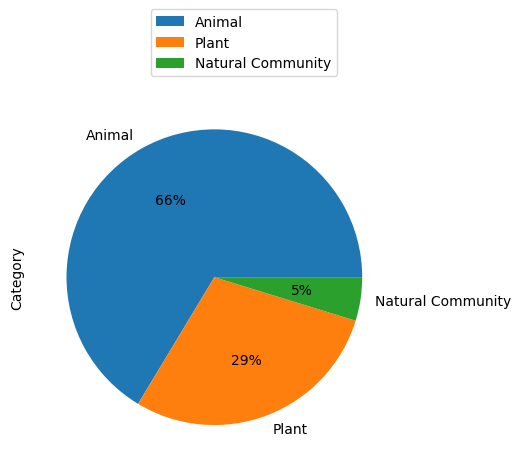

In [ ]:
# Category variable
df['Category'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
plt.legend(bbox_to_anchor=(0.85,1.025), loc="lower right")
# Displays percentage values rounded off

Interpretation: There is a mojority of data for animals: 66% and for Plant cateory: 29%. Only 5% data belongs to natural community.

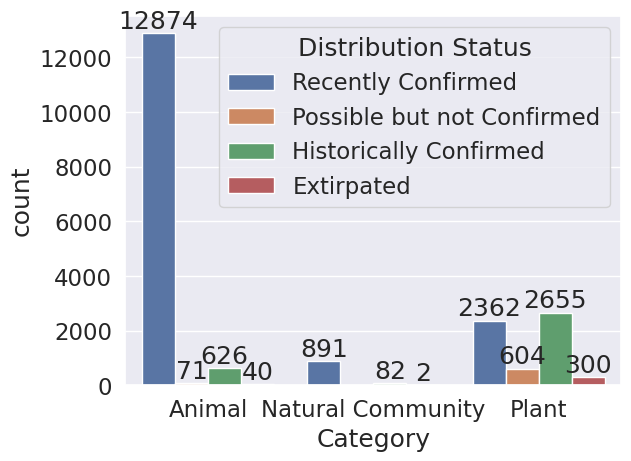

In [ ]:
# Category wrt Distribution Status
ax = sns.countplot(data=df, x='Category', hue = 'Distribution Status')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

Interpretation: Majority of data is from animal category, species which are Recently confirmed. The plant category has next highest species which are recently confirmed (2362) and historically confirmed (2655). Natural community category is mostly recently confirmed (891) and only 82 and 2natural community species are historically confirmed and extirpated.

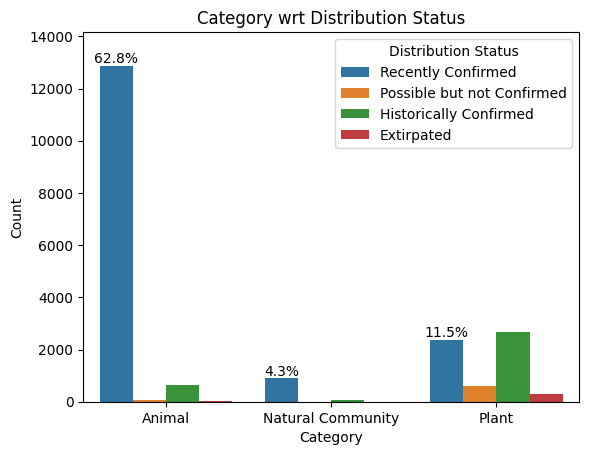

In [ ]:
# Category wrt Distribution Status
ax = sns.countplot(data=df, x='Category', hue = 'Distribution Status')

# get the total count of the type column
total = df['Category'].count()

# annotate the bars with fmt from matplotlib v3.7.0
ax.bar_label(ax.containers[0], fmt=lambda y: f'{(y/total)*100:0.1f}%')

# add space at the end of the bar for the labels
ax.margins(y=0.1)

ax.set(ylabel='Count', xlabel='Category', title='Category wrt Distribution Status')
plt.show()

In [ ]:
df['Taxonomic Group'].value_counts()

Birds                           9678
Flowering Plants                5535
Amphibians                      1193
Reptiles                         600
Fish                             459
Other Animals                    418
Uplands                          417
Freshwater Nontidal Wetlands     396
Dragonflies and Damselflies      382
Ferns and Fern Allies            276
Butterflies and Moths            264
Mammals                          249
Mussels and Clams                206
Animal Assemblages                83
Mosses                            77
Tidal Wetlands                    61
Lakes and Ponds                   41
Rivers and Streams                37
Bees, Wasps and Ants              34
Conifers                          33
Beetles                           20
Marine                            16
Snails                            11
Flies                             10
Subterranean                       7
Stoneflies                         2
Mayflies                           2
N

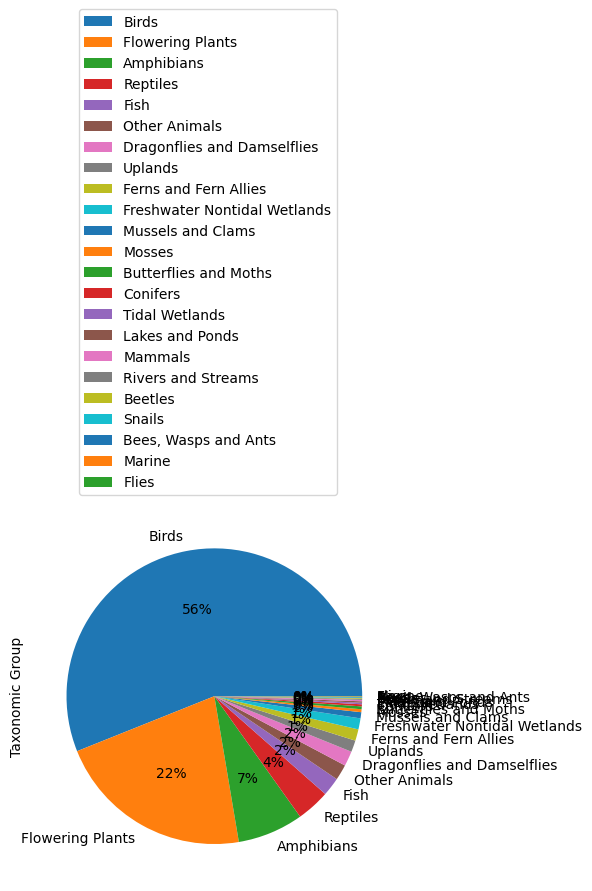

In [ ]:
# Pie chart (%) of Federal Listing Status variable
df['Taxonomic Group'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
plt.legend(bbox_to_anchor=(0.85,1.025), loc="lower right")
# Displays percentage values rounded off

Interpretation: There is 56% data of birds taxonomic group which is in majority, 22% of flowering plants.

In [ ]:
# Taxonomic Subgroup variable
df['Taxonomic Subgroup'].value_counts()


Other Flowering Plants    1884
Wood-Warblers             1285
Sedges                     643
Sparrows and Towhees       626
Salamanders                554
                          ... 
Marine Intertidal            3
Carnivores                   2
Forested Peatlands           2
Whales and Dolphins          1
Killifishes                  1
Name: Taxonomic Subgroup, Length: 89, dtype: int64

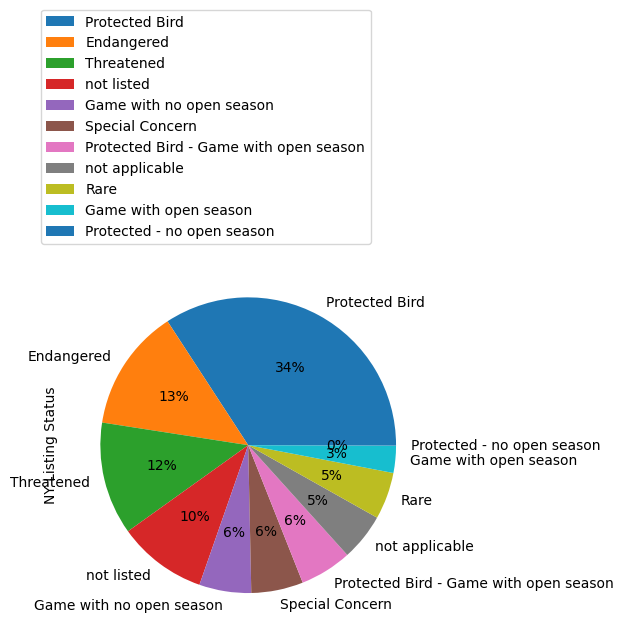

In [ ]:
# Category variable
df['NY Listing Status'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
plt.legend(bbox_to_anchor=(0.85,1.025), loc="lower right")
# Displays percentage values rounded off

Interpretation: The majority of NY listing is for protected bird which is 34%, 13% and 12% of listing is of endangered and Threatened species. 10% of species are not listed in NY.  

Removing rows with unwanted categories in State Conservation Rank and Global COnservation Rank columns

In [ ]:
#Federal Listing Status
df['Federal Listing Status'].value_counts()

not listed             19220
not applicable          1058
Threatened               142
Endangered                84
Proposed Threatened        2
Proposed Endangered        1
Name: Federal Listing Status, dtype: int64

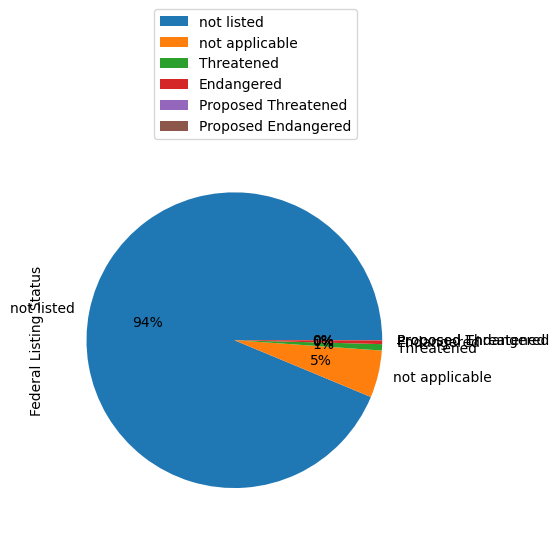

In [ ]:
# Pie chart (%) of Federal Listing Status variable
df['Federal Listing Status'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
plt.legend(bbox_to_anchor=(0.85,1.025), loc="lower right")
# Displays percentage values rounded off

Interpretation: As 94% of data is not listed at Federal level. Therefore, we can remove the variable.

**Dropping variable: Federal listing status**

In [ ]:
df.drop(columns = 'Federal Listing Status', axis=1, inplace = True)

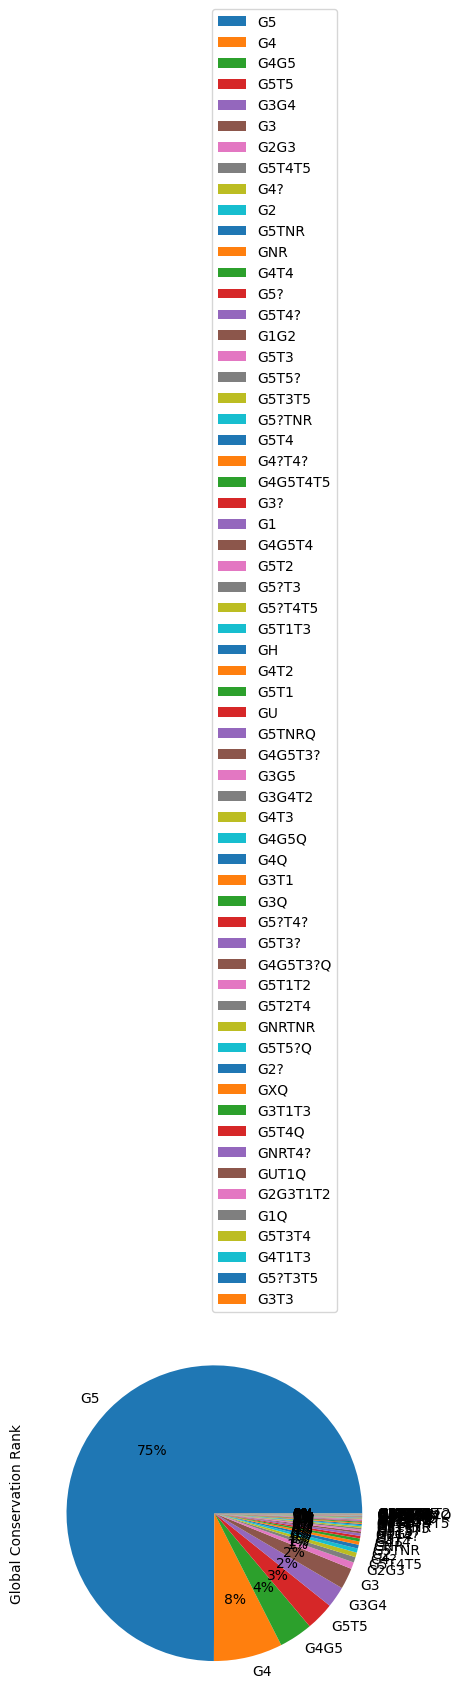

In [ ]:
# Pie chart (%) of Federal Listing Status variable
df['Global Conservation Rank'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
plt.legend(bbox_to_anchor=(0.85,1.025), loc="lower right")
# Displays percentage values rounded off

Interpretation: 75% of Global conservation ranks belongs to G5 status whereas other Global conservation ranks are distributed among remaining ranks.

Handling State Conservation Rank variable

In [ ]:
df['State Conservation Rank'].value_counts()
# Interpretation: We want to remove rows containing comma in State Conservation Ranks because it does not provide specific ranks

S5B           4189
S5            3563
S1            2459
S2            2037
S3            1911
S4            1075
S2S3          1047
S1S2           575
SNA            568
S3B            524
SH             426
S4B            316
S3S4           218
SX             176
S3S4B          149
S2S3B          137
S3B,S1N        115
S2?B            92
S2B             82
S2?             68
SU              68
S3B,SNRN        67
S4S5            62
S2S3B,SNRN      61
S3?B            61
S3B,S3N         58
S2S3B,S2N       58
S1S3            53
S3?             52
S3S4B,S3N       47
S1B             47
SNRN            33
S1?             26
S3S4N           23
S2S4            19
SNRB            11
S1N              8
SNAB,S3N         8
SHB,S1N          7
SNAB             4
S2S3M            4
SNR              2
S1B,S3?N         1
Name: State Conservation Rank, dtype: int64

In [ ]:
 # Extracting indexes of those rows which contains comma in column State Conservation Rank
 index = df['State Conservation Rank'].str.contains(',')

In [ ]:
from collections import Counter
Counter(index)
# There are 422 rows containing comma in it

Counter({False: 20085, True: 422})

In [ ]:
# Extracting indexes of 422 rows which contains comma in column State Conservation Rank
s = index[index == True]
len(s)

422

In [ ]:
# Below indexes needs to be dropped
indexDrop = s[s].index

In [ ]:
indexDrop

Int64Index([   10,    52,    55,    72,    83,    89,    92,    97,   112,
              455,
            ...
            20065, 20076, 20082, 20084, 20089, 20104, 20308, 20326, 20341,
            20343],
           dtype='int64', length=422)

In [ ]:
df.drop(indexDrop, inplace=True)

In [ ]:
len(df)

20085

In [ ]:
df['State Conservation Rank'].value_counts()

S5B      4189
S5       3563
S1       2459
S2       2037
S3       1911
S4       1075
S2S3     1047
S1S2      575
SNA       568
S3B       524
SH        426
S4B       316
S3S4      218
SX        176
S3S4B     149
S2S3B     137
S2?B       92
S2B        82
S2?        68
SU         68
S4S5       62
S3?B       61
S1S3       53
S3?        52
S1B        47
SNRN       33
S1?        26
S3S4N      23
S2S4       19
SNRB       11
S1N         8
SNAB        4
S2S3M       4
SNR         2
Name: State Conservation Rank, dtype: int64

In [ ]:
# Delete rows where the 'State Conservation Ranks' are 'SU' or 'SNR', 'SNA'
indexAge = df[(df['State Conservation Rank'] == 'SU') | (df['State Conservation Rank'] == 'SNR') | (df['State Conservation Rank'] == 'SNA')].index
df.drop(indexAge, inplace=True)
df.head(15)

,County,Category,Taxonomic Group,Taxonomic Subgroup,Scientific Name,Common Name,Year Last Documented,NY Listing Status,State Conservation Rank,Global Conservation Rank,Distribution Status
0,Albany,Animal,Amphibians,Frogs and Toads,Anaxyrus americanus,American Toad,1990-1999,Game with open season,S5,G5,Recently Confirmed
1,Albany,Animal,Amphibians,Frogs and Toads,Anaxyrus fowleri,Fowler's Toad,1990-1999,Game with open season,S4,G5,Recently Confirmed
2,Albany,Animal,Amphibians,Frogs and Toads,Hyla versicolor,Gray Treefrog,1990-1999,Game with open season,S5,G5,Recently Confirmed
3,Albany,Animal,Amphibians,Frogs and Toads,Lithobates catesbeianus,Bullfrog,1990-1999,Game with open season,S5,G5,Recently Confirmed
4,Albany,Animal,Amphibians,Frogs and Toads,Lithobates clamitans,Green Frog,1990-1999,Game with open season,S5,G5,Recently Confirmed
5,Albany,Animal,Amphibians,Frogs and Toads,Lithobates palustris,Pickerel Frog,1990-1999,Game with open season,S5,G5,Recently Confirmed
6,Albany,Animal,Amphibians,Frogs and Toads,Lithobates pipiens,Northern Leopard Frog,1990-1999,Game with open season,S5,G5,Recently Confirmed
7,Albany,Animal,Amphibians,Frogs and Toads,Lithobates sylvaticus,Wood Frog,1990-1999,Game with open season,S5,G5,Recently Confirmed
8,Albany,Animal,Amphibians,Frogs and Toads,Pseudacris crucifer,Spring Peeper,1990-1999,Game with open season,S5,G5,Recently Confirmed
9,Albany,Animal,Amphibians,Frogs and Toads,Scaphiopus holbrookii,Eastern Spadefoot,2006,Special Concern,S2S3,G5,Recently Confirmed


In [ ]:
df['State Conservation Rank'].value_counts()

S5B      4189
S5       3563
S1       2459
S2       2037
S3       1911
S4       1075
S2S3     1047
S1S2      575
S3B       524
SH        426
S4B       316
S3S4      218
SX        176
S3S4B     149
S2S3B     137
S2?B       92
S2B        82
S2?        68
S4S5       62
S3?B       61
S1S3       53
S3?        52
S1B        47
SNRN       33
S1?        26
S3S4N      23
S2S4       19
SNRB       11
S1N         8
SNAB        4
S2S3M       4
Name: State Conservation Rank, dtype: int64

Removing rows with ambiguos ranks in State Conservation Rank

In [ ]:
# List of ambiguous ranks
list = ['S2S3','S1S2','S3S4','S3S4B','S2S3B','S4S5','S1S3','SNRN','S3S4N','S2S4','SNRB','SNAB','S2S3M']

In [ ]:
# Removing ambiguous ranks from variable
df = df[~df['State Conservation Rank'].isin(list)]

In [ ]:
df['State Conservation Rank'].value_counts()

S5B     4189
S5      3563
S1      2459
S2      2037
S3      1911
S4      1075
S3B      524
SH       426
S4B      316
SX       176
S2?B      92
S2B       82
S2?       68
S3?B      61
S3?       52
S1B       47
S1?       26
S1N        8
Name: State Conservation Rank, dtype: int64

In [ ]:
#  ? after a rank, such as S2?, indicates some uncertainty about the true rank, but is most likely the assigned rank. Therefore, such ranks are replaced by the most likely state conservation rank.
df['State Conservation Rank'].replace('S2?B', 'S2B', inplace=True)
df['State Conservation Rank'].replace('S2?', 'S2', inplace=True)
df['State Conservation Rank'].replace('S3?B', 'S3', inplace=True)
df['State Conservation Rank'].replace('S3?', 'S3', inplace=True)
df['State Conservation Rank'].replace('S1?', 'S1', inplace=True)

In [ ]:
df['State Conservation Rank'].value_counts()

S5B    4189
S5     3563
S1     2485
S2     2105
S3     2024
S4     1075
S3B     524
SH      426
S4B     316
SX      176
S2B     174
S1B      47
S1N       8
Name: State Conservation Rank, dtype: int64

**Removing unwanted ranks from Global Conservation Rank variable**

In [ ]:
value = df['Global Conservation Rank'].value_counts()
# Interpretation: We want to remove rows containing comma in State Conservation Ranks because it does not provide any specific rank which is ambiguous
len(value)

62

Deleting following ranks: GU- Unrankable: Currently unrankable due to lack of information or due to substantially conflicting information about status or trends. GNR- Not Ranked: global conservation status not yet assessed. GNA- Not Applicable, because the species is not a suitable target for conservation activities (e.g., species is a hybrid, or a domesticated species).

In [ ]:
# Delete rows where the 'State Conservation Ranks' are 'GU' or 'GNR', 'GNA'
indexGCR = df[(df['Global Conservation Rank'] == 'GU') | (df['Global Conservation Rank'] == 'GNR') | (df['Global Conservation Rank'] == 'GNA')].index
df.drop(indexGCR, inplace=True)
#df.head(15)

In [ ]:
len(df)

17045

In [ ]:
df['Global Conservation Rank'].value_counts()

G5          12826
G4           1286
G4G5          630
G5T5          530
G3G4          395
G3            394
G2G3          126
G5T4T5        102
G4?            87
G2             77
G5TNR          72
G4T4           56
G5T4?          48
G5?            48
G1G2           36
G5T3           35
G5T5?          31
G5T3T5         28
G5T4           22
G5?TNR         22
G4?T4?         21
G4G5T4T5       20
G3?            14
G1             13
G4G5T4         11
G5T2           11
G5?T3          11
G5?T4T5         8
G5T1T3          7
GH              6
G4T2            6
G5T1            6
G5TNRQ          5
G3G5            4
G3G4T2          4
G4G5T3?         4
G4T3            3
G4G5Q           3
G4Q             3
G3T1            3
G3Q             3
G5?T4?          3
G4G5T3?Q        2
G5T3?           2
G5T1T2          2
G5T2T4          2
GNRTNR          2
G5T5?Q          2
G2?             2
GXQ             1
G3T1T3          1
G5T4Q           1
GNRT4?          1
GUT1Q           1
G2G3T1T2        1
G1Q       

In [ ]:
gcr = (df['Global Conservation Rank'].value_counts()).index

In [ ]:
gcr

Index(['G5', 'G4', 'G4G5', 'G5T5', 'G3G4', 'G3', 'G2G3', 'G5T4T5', 'G4?', 'G2',
       'G5TNR', 'G4T4', 'G5T4?', 'G5?', 'G1G2', 'G5T3', 'G5T5?', 'G5T3T5',
       'G5T4', 'G5?TNR', 'G4?T4?', 'G4G5T4T5', 'G3?', 'G1', 'G4G5T4', 'G5T2',
       'G5?T3', 'G5?T4T5', 'G5T1T3', 'GH', 'G4T2', 'G5T1', 'G5TNRQ', 'G3G5',
       'G3G4T2', 'G4G5T3?', 'G4T3', 'G4G5Q', 'G4Q', 'G3T1', 'G3Q', 'G5?T4?',
       'G4G5T3?Q', 'G5T3?', 'G5T1T2', 'G5T2T4', 'GNRTNR', 'G5T5?Q', 'G2?',
       'GXQ', 'G3T1T3', 'G5T4Q', 'GNRT4?', 'GUT1Q', 'G2G3T1T2', 'G1Q',
       'G5T3T4', 'G4T1T3', 'G5?T3T5', 'G3T3'],
      dtype='object')

In [ ]:
# List of ambiguous ranks
list_gcr = ['G1','G2','G3','G4','G5','GH','GX','G1?','G2?','G3?','G4?','G5?']

In [ ]:
# Removing ambiguous ranks
df = df[df['Global Conservation Rank'].isin(list_gcr)]

In [ ]:
df['Global Conservation Rank'].value_counts()

G5     12826
G4      1286
G3       394
G4?       87
G2        77
G5?       48
G3?       14
G1        13
GH         6
G2?        2
Name: Global Conservation Rank, dtype: int64

In [ ]:
# Global Conservation Rank
df['Global Conservation Rank'].replace('G1?', 'G1', inplace=True)
df['Global Conservation Rank'].replace('G2?', 'G2', inplace=True)
df['Global Conservation Rank'].replace('G3?', 'G3', inplace=True)
df['Global Conservation Rank'].replace('G4?', 'G4', inplace=True)
df['Global Conservation Rank'].replace('G5?', 'G5', inplace=True)

In [ ]:
len(df)

14753

In [ ]:
df.to_csv('PreProcessedData.csv', index = True)